# Setup

In [4]:
# Common imports
import numpy as np
import os

# Make the notebook's output stable across runs
np.random.seed(42)

# Matplotlib setup
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# For saving things
from joblib import dump, load

# Linear Regression

* What is a linear equation?
* What does linear regression try to do?
* What is the vectorized form of a linear equation?
 * What is an advantage of using the vectorized form?
  * Easier to write
  * Covers many parameters
* Why is $x_0$ always set to 1 in the following equation: y = m$x_1$ + b$x_0$

## The Normal Equation

$\widehat{\theta} = (X^T X)^{-1} X^T y$

* $\widehat{\theta}$ is the value of the parameter vector, ${\theta}$, that minimizes the cost function
* $y$ is the vector of target values, $y^{(1)}$ to $y^{(m)}$
* $X^T$ is the transpose of $X$
* $X^T X$ is the dot product of $X^T$ and $X$
* $(X^T X)^{-1}$ is the inverse of the dot product of $X^T$ and $X$
* $X^T y$ is the dot product of the transpose of $X$ and $y$
* There are 3 total dot products happening here

This is a _closed form solution_ , i.e. a solution that solves the parameters directly.

Create the equation: y = 3$x_1$ + 4$x_0$
_Remember, we will set $x_0$ to 1_.

__3 and 4 are our parameters in this equation__.

In [31]:
# Generate some linear data to test the closed form.
X = 2 * np.random.rand(100, 1)

# Create the equation
y = 4 + 3 * X + np.random.randn(100, 1)

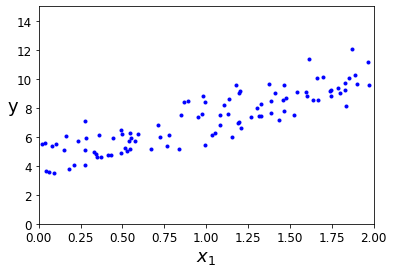

In [32]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("y", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

Compute $\widehat{\theta}$ using the normal equation.

In [33]:
# Remember that x_0 is always set to 1.
# So, add x_0 = 1 to each instance.
# These are not our parameters, but our features (x data).
X_b = np.c_[np.ones((100, 1)), X] 

In [34]:
help(np.c_)

Help on CClass in module numpy.lib.index_tricks object:

class CClass(AxisConcatenator)
 |  Translates slice objects to concatenation along the second axis.
 |  
 |  This is short-hand for ``np.r_['-1,2,0', index expression]``, which is
 |  useful because of its common occurrence. In particular, arrays will be
 |  stacked along their last axis after being upgraded to at least 2-D with
 |  1's post-pended to the shape (column vectors made out of 1-D arrays).
 |  
 |  See Also
 |  --------
 |  column_stack : Stack 1-D arrays as columns into a 2-D array.
 |  r_ : For more detailed documentation.
 |  
 |  Examples
 |  --------
 |  >>> np.c_[np.array([1,2,3]), np.array([4,5,6])]
 |  array([[1, 4],
 |         [2, 5],
 |         [3, 6]])
 |  >>> np.c_[np.array([[1,2,3]]), 0, 0, np.array([[4,5,6]])]
 |  array([[1, 2, 3, 0, 0, 4, 5, 6]])
 |  
 |  Method resolution order:
 |      CClass
 |      AxisConcatenator
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self)
 |    

In [35]:
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

What does the above line of code do? Let's translate to the normal equation.
* inv(X_b.T.dot(X_b))
 * $(X^T X)^{-1}$
* inv(X_b.T.dot(X_b)).dot(X_b.T)
 * $(X^T X)^{-1} X^T$
* inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
 * $(X^T X)^{-1} X^T y$
 
 $\widehat{\theta} = (X^T X)^{-1} X^T y$, where $\widehat{\theta}$ is the parameter vector that minimizes the cost function.

In [36]:
theta_best

array([[4.25186821],
       [2.95912104]])

Our actual parameters were 3 and 4, y = $x_0$4 + 3$x_1$ + Gaussian noise.

The noise made it impossible to recover the exact parameters.

How close did we get?

In [40]:
# Now we can make predictions using theta_best, i.e. theta hat in the above equation.
X_new = np.array([[0], [2]])
X_new

array([[0],
       [2]])

In [42]:
X_new_b = np.c_[np.ones((2, 1)), X_new] # add x_0 = 1 to each instance
X_new_b

array([[1., 0.],
       [1., 2.]])

Now we have features (x-values):
* $x_0$ = 1 and 1
* $x_1$ = 0 and 2.

And we have parameter values:
* The two theta_best values from the book
 * 4.21
 * 2.77
 
For each set of x-values we want to get the equation: $\widehat{y}$ = $x_0$4.21 + $x_1$2.77

Recall the vectorized form is: $\widehat{\theta}$ = $\theta$ $x$ = theta_best x-values, which gives us the above equation.

In [43]:
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 4.25186821],
       [10.17011029]])

Given the perfect equation y = 3 + 4x, the predicted y values are:
* 4(1) + 3(0) = 4
* 4(1) + 3(2) = 10

How close were we?

Let's plot the model's predictions.

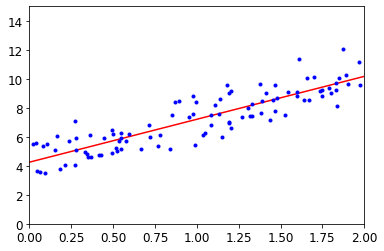

In [44]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

Now let's see how to do linear regression with sklearn

In [45]:
from sklearn.linear_model import LinearRegression

In [46]:
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.25186821]), array([[2.95912104]]))

In [47]:
lin_reg.predict(X_new)

array([[ 4.25186821],
       [10.17011029]])

The sklearn LinearRegression class is based on the scipy linear algebra least squares function.  See below.

In [48]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.25186821],
       [2.95912104]])

The svd stands for _Singular Value Decomposition_, which is a matrix factorization technique for computing the _pseudo inverse_ instead of the normal equation.  The pseudo inverse calculation is more efficient than computing the normal equation.  Also, the normal equation may not work in some cases, but the pseudo inverse is "always defined".

## Computational Complexity

* Finding the best parameters gets very slow for both the Normal Equation and pseudo inverse when there are a large number of features
 * O($n^2$) to O($n^3$) for features
* Calculating predictions is very fast once the best parameters are found
 * O(n) for both features and instances
* Training sets have to be able to fit in memory

# Gradient Descent

Unlike above example using the inverse of the matrices to calculate the best parameters, the idea of gradient descent is to iteratively tweak parameters until the ones that minimize the cost function are found.

Concepts and Terminology
* _Gradient_ is slope
* _random initialization_ of parameters
* The algorithm _converges_ to a minimum when the _gradient_ is 0
* High _learning rate_ could cause the algorithm to _diverge_
* Low _learning rate_ could cause the algorithm to take excessive time to _converge_
* Algorithm could _converge_ to a _local minimum_ instead of a _global minimum_
* MSE cost function is a _convex function_ which prevents it from converging on a local minimum
* Gradient descent will _converge_ much faster if all features use a similar scale
 * Use sklearn's _StandardScaler_ class to help with this
* Gradient descent searches the _parameter space_
 * The more parameters, the harder (longer?) the search

## Batch Gradient Descent

With Batch Gradient Descent the _gradient_ of the cost function is calculated with respect to each parameter, i.e. how much will the cost function change if the parameter under consideration changes a little bit.

Mathmatically, this is the partial derivitive of the cost function with respect to the given parameter.

The _gradient vector_ contains all of the partial derivitives (gradients) of the cost function for each parameter.

Gradient Vector:

${\nabla}_{\theta}$MSE($\theta$) = $\frac{2}{m}X^T(X\theta - y)$

Concepts and Terminology
* _Batch_ in 'Batch Gradient Descent' means that it uses the entire training set, i.e. batch, for calculating the Gradient Vector
* Very slow on large training sets
 * But there are faster algorithms to be seen later
* Scales very well with the number of features
 * Training hundreds of thousands of features is much faster with gradient descent vs Normal Equation or SVD decomposition

To converge on a parameter vector iteratively, we need a formula to calculate the next parameter vector from the current parameter vector:

$\theta^{(next step)} = \theta - \eta\nabla_{\theta}$MSE$(\theta)$

where:
* $\eta$ is the learning rate
* $\nabla_{\theta}$MSE$(\theta)$ is the gradiant vector calculated from the current parameter vector
* $\theta$ is the current parameter vector
* $\theta^{(next step)}$ are the is the new parameter vector

Looking at the equation, if each gradient in $\nabla_{\theta}$MSE$(\theta)$ becomes zero, then the parameters would stop changing and the algorithm has converged.

Let's implement the batch gradient descent algorithm using the above equation:

In [50]:
eta = 0.1 # Learning rate
n_iterations = 1000
m = 100

theta = np.random.randn(2, 1) # random initialization

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [52]:
theta # Same as predicted with theta_best_svd

array([[4.25186821],
       [2.95912104]])

How do we know how many iterations to use?  We don't.  May just have to interupt the algorithm when the gradient vector becomes tiny and the parameters are therefore not moving much.

The smaller we make the tolerance for the gradients, the longer the algorithm can take to converge.  Making the tolerance 10 times smaller can make the algorithm take 10 times longer to converge.



How does learning rate affect convergence?

Let's try a few different learning rates and see.

fig size: 72.0 DPI, size in inches [4. 3.]


ValueError: too many values to unpack (expected 1)

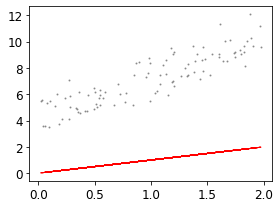

In [57]:
theta = np.random.randn(2, 1) # random initialization
eta = 0.1 # Learning rate

# Define code to animate the plots.
# Retrieved from https://nipunbatra.github.io/blog/2017/linear-regression-prior.html

# Code courtesy: http://eli.thegreenplace.net/2016/drawing-animated-gifs-with-matplotlib/
from matplotlib.animation import FuncAnimation

fig, ax = plt.subplots(figsize=(4, 3))
fig.set_tight_layout(True)

# Query the figure's on-screen size and DPI. Note that when saving the figure to
# a file, we need to provide a DPI for that separately.
print('fig size: {0} DPI, size in inches {1}'.format(
    fig.get_dpi(), fig.get_size_inches()))

# Plot a scatter that persists (isn't redrawn) and the initial line.

ax.scatter(X, y, color='grey', alpha=0.8, s=1)

# Initial Line
line, = ax.plot(X_b, X_b.dot(theta), 'r-', linewidth=1)

def update(i):
    label = 'Iteration {0}'.format(i)
    # Calculate new parameters
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients
    # Calculate all of the y values
    line.set_ydata(X_b.dot(theta))
    ax.set_xlabel(label)
    format_axes(ax)
    return line, ax

anim = FuncAnimation(fig, update, frames=np.arange(0, 100), interval=1)
anim.save('line_prior.gif', dpi=80, writer='imagemagick')
plt.close()